In [ ]:
# 연산 처리를 위한 패키지
import pandas as pd
import numpy as np

# 그룹화를 위한 패키지
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 데이터 셋
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_wine

import statsmodels.api as sm

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_excel('(자동차보험) 고객별 사고 발생률 예측 모델링_1.xlsx')
df2 = pd.read_excel('(자동차보험) 고객별 사고 발생률 예측 모델링_2.xlsx')
df3 = pd.read_excel('(자동차보험) 고객별 사고 발생률 예측 모델링_3.xlsx')

In [ ]:
df1

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0,1,NaN,B,신차,기타,5,가족및형제자매한정,8,5천만원이하,가입,15000K,0.688219,0
1,A10,0,1,NaN,N,신차,기타,4,기명피보험자1인한정,8,미가입,미가입,15000K,0.758356,0
2,A10,0,1,NaN,N,신차,기타,2,가족한정(형제자매제외),5,5천만원이하,가입,미가입,0.769315,3
3,A10,0,1,1.0,N,10년이상,중형,2,가족한정(형제자매제외),2,5천만원이하,미가입,15000K,0.372603,0
4,A10,0,1,1.0,Z,5년이하,다목적2종,2,가족한정(형제자매제외),1,미가입,미가입,미가입,0.006575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105812,A10,40,1,1.0,D,5년이하,중형,4,기명피보험자1인한정,6,5천만원이하,미가입,미가입,1.358904,0
105813,A10,40,1,1.0,D,10년이상,소형A,3,부부한정,2,5천만원이하,미가입,15000K,2.338630,0
105814,A10,40,1,1.0,D,10년이하,대형,3,부부한정,2,5천만원이하,가입,15000K,1.547397,0
105815,A10,40,1,1.0,D,10년이상,중형,3,부부한정,7,5천만원이하,미가입,15000K,18.489863,3


In [ ]:
df2

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,40,2,1.0,D,10년이하,소형A,4,기명피보험자1인한정,8,5천만원이하,미가입,12000K,3.184658,0
1,A10,40,2,1.0,D,10년이상,대형,4,기명피보험자1인한정,3,5천만원이하,미가입,15000K,4.604931,1
2,A10,40,2,1.0,D,10년이하,다목적2종,4,기명피보험자1인한정,6,5천만원이하,미가입,미가입,1.137534,0
3,A10,40,2,1.0,D,10년이하,다목적2종,3,부부한정,7,5천만원이하,미가입,미가입,5.990137,2
4,A10,40,2,1.0,D,10년이상,대형,7,1인 및 지정1인,8,미가입,미가입,15000K,9.854247,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102721,A10,60,2,1.0,N,5년이하,대형,1,누구나(기본),8,1억이상,미가입,미가입,0.287123,0
102722,A10,60,2,1.0,N,10년이하,다목적2종,12,부부 및 자녀한정,7,5천만원이하,가입,미가입,0.021918,0
102723,A10,60,2,1.0,N,5년이하,중형,3,부부한정,2,1억이하,가입,15000K,0.484384,1
102724,A10,60,2,1.0,N,신차,중형,12,부부 및 자녀한정,8,5천만원이하,가입,5000K,0.026301,0


In [ ]:
df3

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,60,2,1.0,N,10년이하,소형B,4,기명피보험자1인한정,5,미가입,가입,미가입,1.001644,0
1,A10,60,2,1.0,N,10년이하,다목적2종,12,부부 및 자녀한정,8,미가입,가입,12000K,2.253151,0
2,A10,60,2,1.0,N,10년이하,대형,5,가족및형제자매한정,6,미가입,가입,15000K,0.372603,0
3,A10,60,2,1.0,N,5년이하,소형B,2,가족한정(형제자매제외),2,5천만원이하,가입,15000K,0.232329,0
4,A10,60,2,1.0,N,5년이하,소형A,1,누구나(기본),7,5천만원이하,가입,15000K,0.427397,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59229,A10,40,2,1.0,C,10년이상,중형,1,누구나(기본),8,미가입,미가입,7000K,0.372603,0
59230,A10,40,2,1.0,C,5년이하,소형A,12,부부 및 자녀한정,8,5천만원이하,가입,15000K,1.812603,0
59231,A10,40,2,1.0,C,10년이하,소형A,4,기명피보험자1인한정,8,미가입,미가입,미가입,6.373699,1
59232,A10,40,2,1.0,C,5년이하,소형B,1,누구나(기본),7,5천만원이하,가입,미가입,0.403288,0


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)

df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0,1,NaN,B,신차,기타,5,가족및형제자매한정,8,5천만원이하,가입,15000K,0.688219,0
1,A10,0,1,NaN,N,신차,기타,4,기명피보험자1인한정,8,미가입,미가입,15000K,0.758356,0
2,A10,0,1,NaN,N,신차,기타,2,가족한정(형제자매제외),5,5천만원이하,가입,미가입,0.769315,3
3,A10,0,1,1.0,N,10년이상,중형,2,가족한정(형제자매제외),2,5천만원이하,미가입,15000K,0.372603,0
4,A10,0,1,1.0,Z,5년이하,다목적2종,2,가족한정(형제자매제외),1,미가입,미가입,미가입,0.006575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,A10,40,2,1.0,C,10년이상,중형,1,누구나(기본),8,미가입,미가입,7000K,0.372603,0
267773,A10,40,2,1.0,C,5년이하,소형A,12,부부 및 자녀한정,8,5천만원이하,가입,15000K,1.812603,0
267774,A10,40,2,1.0,C,10년이하,소형A,4,기명피보험자1인한정,8,미가입,미가입,미가입,6.373699,1
267775,A10,40,2,1.0,C,5년이하,소형B,1,누구나(기본),7,5천만원이하,가입,미가입,0.403288,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267777 entries, 0 to 267776
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ZCPRLCLCD      267777 non-null  object 
 1   ZINSRDAVL      267777 non-null  int64  
 2   ZIOSEXCD       267777 non-null  int64  
 3   ZDPRODSCD      267584 non-null  float64
 4   NCR            267777 non-null  object 
 5   ZCARPSGVL      267777 non-null  object 
 6   차종             267777 non-null  object 
 7   ZDRVLISCD      267777 non-null  int64  
 8   ZDRVLISCD___T  267777 non-null  object 
 9   ZENTCARCD      267777 non-null  int64  
 10  ZCARISDAM      267777 non-null  object 
 11  ZIMAGERVL      267777 non-null  object 
 12  마일리지약정거리       267777 non-null  object 
 13  YUHO           267777 non-null  float64
 14  SAGO           267777 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 30.6+ MB


In [ ]:
df.isnull().sum()

ZCPRLCLCD          0
ZINSRDAVL          0
ZIOSEXCD           0
ZDPRODSCD        193
NCR                0
ZCARPSGVL          0
차종                 0
ZDRVLISCD          0
ZDRVLISCD___T      0
ZENTCARCD          0
ZCARISDAM          0
ZIMAGERVL          0
마일리지약정거리           0
YUHO               0
SAGO               0
dtype: int64

In [ ]:
# 데이터셋 기술 통계량 확인

statistics = df.describe()
statistics.loc['skewness'] = df.skew()
statistics.loc['kurtosis'] = df.kurtosis()

# Pandas 출력 옵션 설정 (모든 결과를 볼 수 있도록)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)  # 필요한 경우 화면 너비도 조정

# 모든 결과 출력
statistics

,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,ZDRVLISCD,ZENTCARCD,YUHO,SAGO
count,267777.000000,267777.000000,267584.000000,267777.000000,267777.000000,267777.000000,267777.000000
mean,42.441920,1.540114,1.334564,4.090557,5.900376,8.292638,1.701136
std,15.103357,0.498389,0.471839,2.782105,2.206845,94.319274,14.809020
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,2.000000,4.000000,0.289315,0.000000
50%,40.000000,2.000000,1.000000,4.000000,7.000000,0.699178,0.000000
75%,50.000000,2.000000,2.000000,5.000000,8.000000,1.974794,1.000000
max,100.000000,2.000000,2.000000,12.000000,8.000000,12044.929315,1847.000000
skewness,0.452645,-0.160974,0.701244,1.532407,-0.671647,50.984643,43.922652
kurtosis,-0.469407,-1.974102,-1.508268,2.025901,-0.837719,3893.943298,3135.499590


In [ ]:
# Pandas 출력 옵션 초기화
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')

In [ ]:
# 각 열의 고유값 개수 확인
df.nunique()

ZCPRLCLCD            1
ZINSRDAVL           11
ZIOSEXCD             2
ZDPRODSCD            2
NCR                  6
ZCARPSGVL            4
차종                   7
ZDRVLISCD           10
ZDRVLISCD___T       10
ZENTCARCD            8
ZCARISDAM            4
ZIMAGERVL            2
마일리지약정거리             7
YUHO             19438
SAGO               351
dtype: int64

In [ ]:
# Determine columns by data types
cat_mask = (df.dtypes == np.object)
num_mask = (df.dtypes == np.float64) | (df1.dtypes == np.int64)

cat_cols = df.columns[cat_mask].tolist()
num_cols = df.columns[num_mask].tolist()

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')
print(len(num_cols))
print(len(cat_cols))

Categorical columns: ['ZCPRLCLCD', 'NCR', 'ZCARPSGVL', '차종', 'ZDRVLISCD___T', 'ZCARISDAM', 'ZIMAGERVL', '마일리지약정거리']
Numerical columns: ['ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'ZDRVLISCD', 'ZENTCARCD', 'YUHO', 'SAGO']
7
8


In [ ]:
# plotting 함수 생성
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):

    """ Returns multiple histograms as subplots
    """
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution')
            ax.tick_params(axis='x')
            ax.tick_params(axis='y')
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

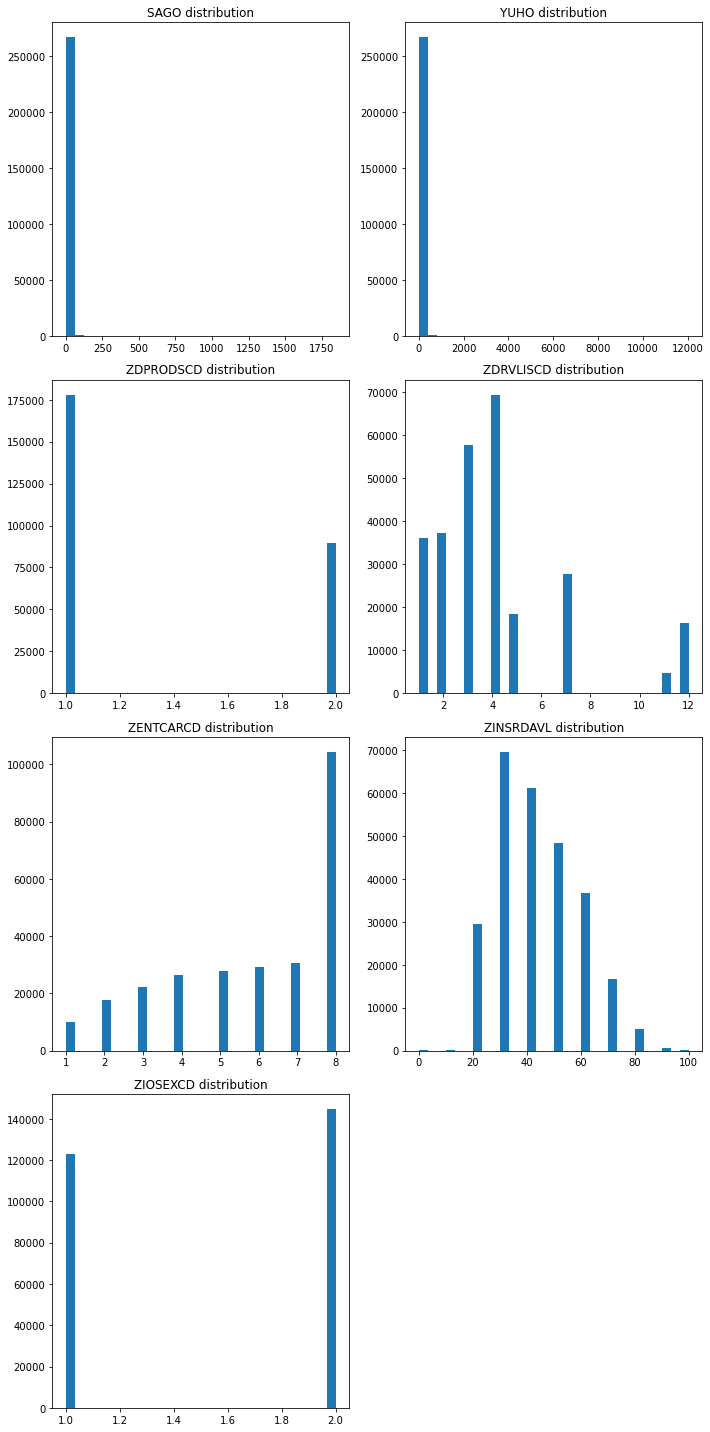

In [ ]:
# Plot all numerical features
hist_loop(data=df[num_cols],
          rows=4,
          cols=2,
          figsize=(10,20))

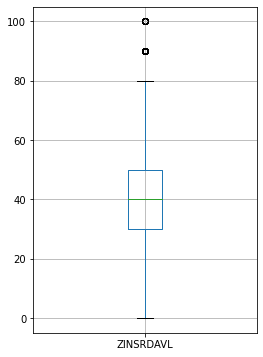

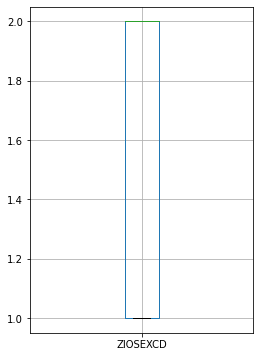

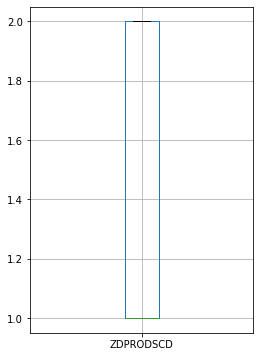

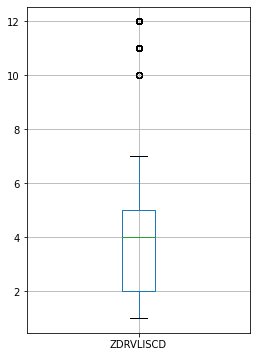

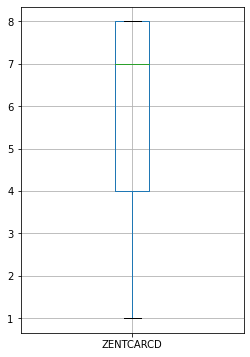

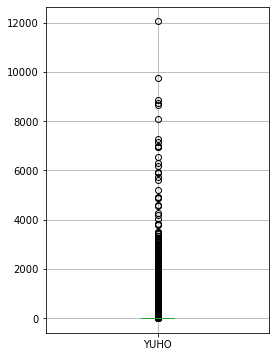

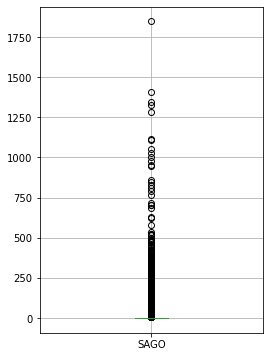

In [ ]:
for num_col in num_cols:
    df[[num_col]].boxplot(figsize=(4,6))
    plt.show()

           ZINSRDAVL  ZIOSEXCD  ZDPRODSCD  ZDRVLISCD  ZENTCARCD      YUHO  \
ZINSRDAVL   1.000000 -0.016801   0.009837   0.135296   0.332461  0.011359   
ZIOSEXCD   -0.016801  1.000000   0.009850  -0.002952   0.094842  0.038052   
ZDPRODSCD   0.009837  0.009850   1.000000  -0.004923   0.060846 -0.026486   
ZDRVLISCD   0.135296 -0.002952  -0.004923   1.000000   0.091022 -0.012500   
ZENTCARCD   0.332461  0.094842   0.060846   0.091022   1.000000  0.062986   
YUHO        0.011359  0.038052  -0.026486  -0.012500   0.062986  1.000000   
SAGO        0.017474  0.040824  -0.032193  -0.011474   0.069546  0.974823   

               SAGO  
ZINSRDAVL  0.017474  
ZIOSEXCD   0.040824  
ZDPRODSCD -0.032193  
ZDRVLISCD -0.011474  
ZENTCARCD  0.069546  
YUHO       0.974823  
SAGO       1.000000  



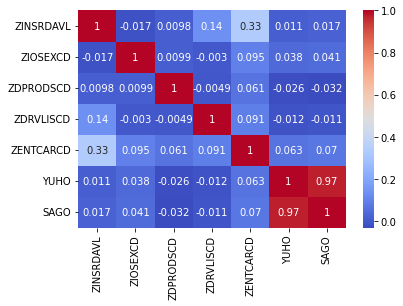

<Figure size 144000x288000 with 0 Axes>

In [ ]:
# 변수들 간의 상관계수 계산
correlation = df[num_cols].corr()
print(correlation)
print()

# 상관계수 히트맵 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.figure(figsize=(2000,4000))
plt.show()

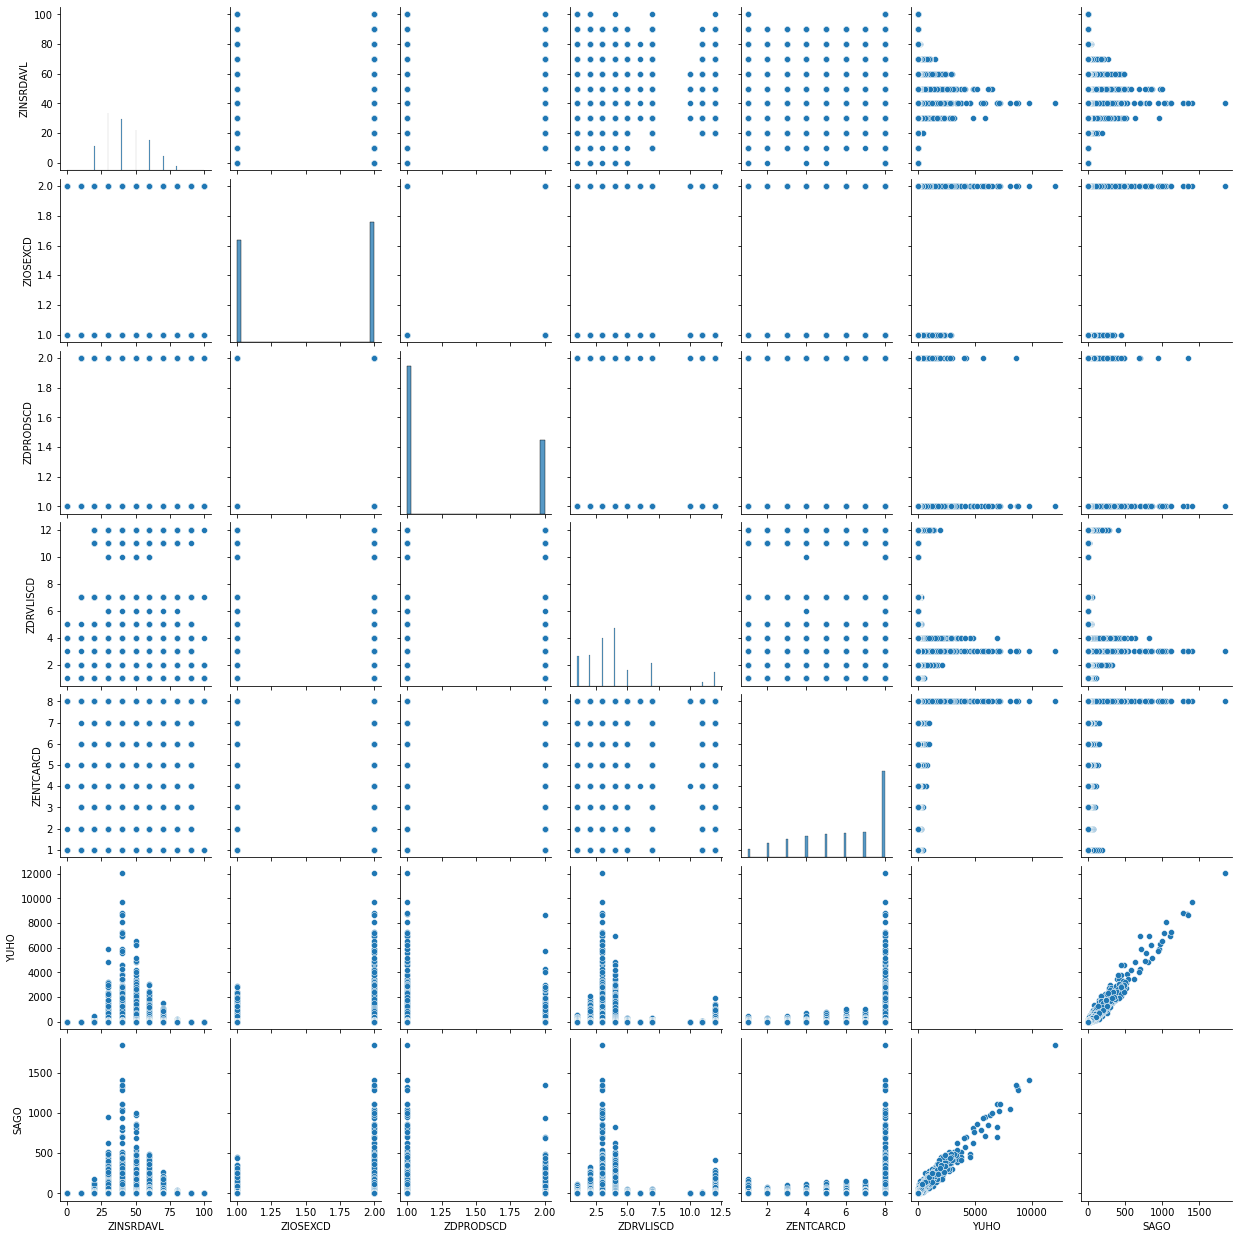

In [ ]:
# 변수들 간의 산점도 행렬 시각화
sns.pairplot(df[num_cols])

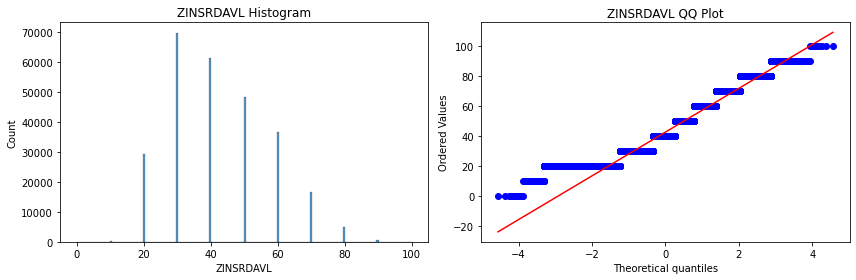

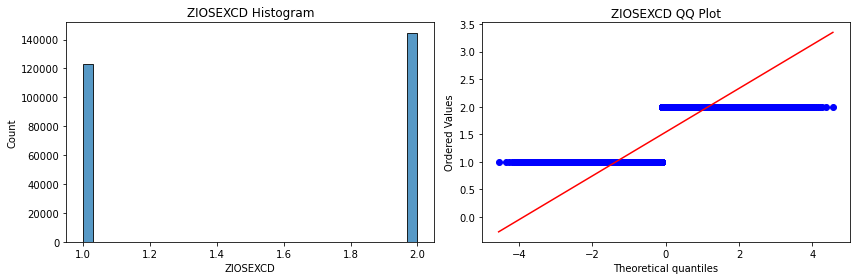

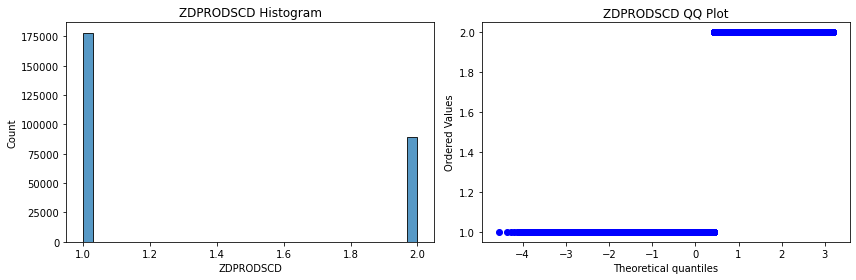

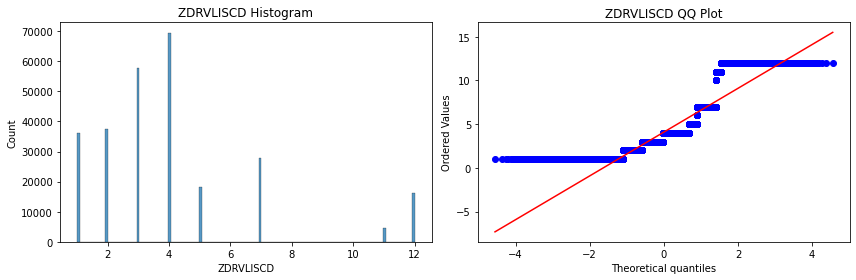

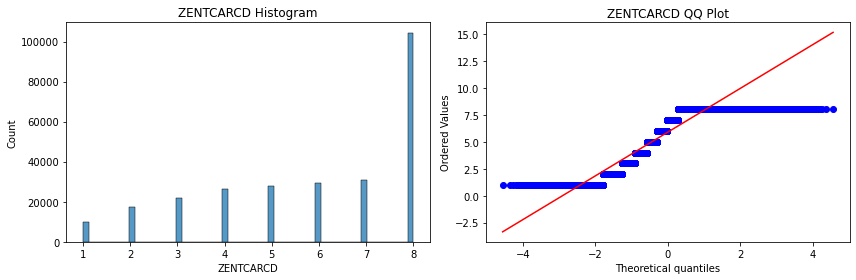

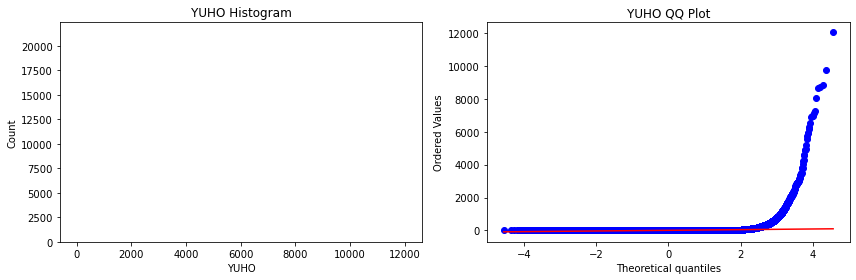

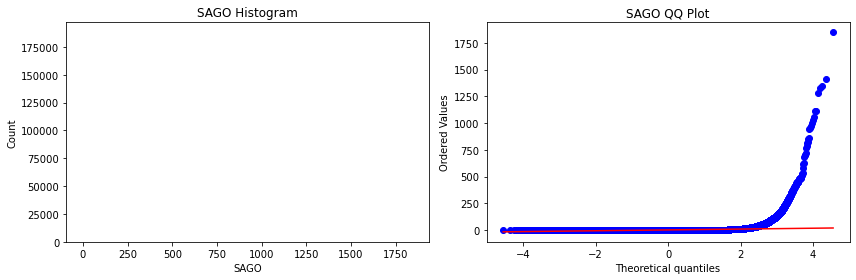

In [ ]:
import seaborn as sns
from scipy import stats

# 정규성 확인을 위한 히스토그램과 QQ plot 그리기
def check_normality1(data, variable):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 히스토그램 그리기
    sns.histplot(data[variable], ax=axes[0])
    axes[0].set_title(f'{variable} Histogram')

    # QQ plot 그리기
    stats.probplot(data[variable], plot=axes[1])
    axes[1].set_title(f'{variable} QQ Plot')

    plt.tight_layout()
    plt.show()

# 변수들의 정규성 확인

for num_col in num_cols:
    check_normality1(df, num_col)

In [ ]:
from scipy.stats import kstest

# 정규성 검정 함수
def check_normality2(data, variable):
    # Kolmogorov-Smirnov 검정 수행
    stat, p_value = kstest(data[variable], 'norm')

    # 결과 출력
    print(f"Kolmogorov-Smirnov Test - p-value: {p_value}")

    # 정규성 검정 결과에 따라 해석
    if p_value > 0.05:
        print(f"{variable}은(는) 정규 분포를 따릅니다.")
    else:
        print(f"{variable}은(는) 정규 분포를 따르지 않습니다.")

# 변수들의 정규성 검정 실행
for num_col in num_cols:
    print(f"{num_col} 정규성 검정 결과")
    check_normality2(df, num_col)
    print()

ZINSRDAVL 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
ZINSRDAVL은(는) 정규 분포를 따르지 않습니다.

ZIOSEXCD 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
ZIOSEXCD은(는) 정규 분포를 따르지 않습니다.

ZDPRODSCD 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: nan
ZDPRODSCD은(는) 정규 분포를 따르지 않습니다.

ZDRVLISCD 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
ZDRVLISCD은(는) 정규 분포를 따르지 않습니다.

ZENTCARCD 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
ZENTCARCD은(는) 정규 분포를 따르지 않습니다.

YUHO 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
YUHO은(는) 정규 분포를 따르지 않습니다.

SAGO 정규성 검정 결과
Kolmogorov-Smirnov Test - p-value: 0.0
SAGO은(는) 정규 분포를 따르지 않습니다.



In [ ]:
df_non_null = df.dropna()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image

# Feature와 Target 분리
X = df_non_null[num_cols].drop('SAGO', axis=1)
y = df_non_null['SAGO']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 피팅 및 변수 중요도 계산
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

# 변수 중요도 출력
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

ZINSRDAVL: 0.005564574188689892
ZIOSEXCD: 0.0014134670870605756
ZDPRODSCD: 0.0018150597923780206
ZDRVLISCD: 0.0057752679499622215
ZENTCARCD: 0.0025832967770363395
YUHO: 0.9828483342048729


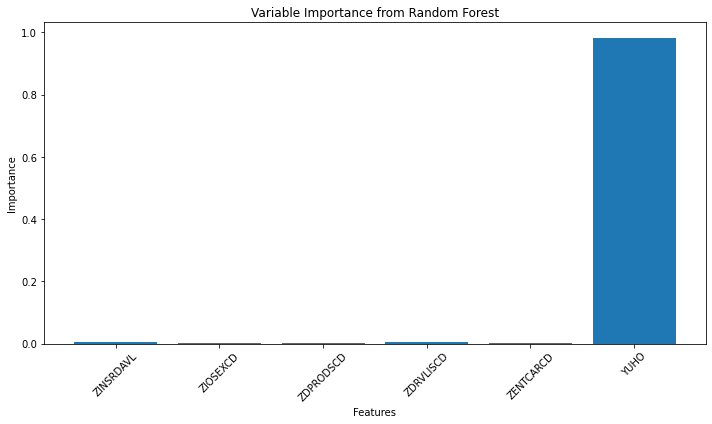

In [ ]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.title('Variable Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_A = df.dropna()
df_A = df_A[df_A['YUHO'] < 5]
df_A['SAGO'] = np.where(df_A['SAGO'] != 0, 1, 0)


In [ ]:
# 데이터셋 기술 통계량 확인

statistics = df_A.describe()
statistics.loc['skewness'] = df_A.skew()
statistics.loc['kurtosis'] = df_A.kurtosis()

# Pandas 출력 옵션 설정 (모든 결과를 볼 수 있도록)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)  # 필요한 경우 화면 너비도 조정

# 모든 결과 출력
statistics

,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,ZDRVLISCD,ZENTCARCD,YUHO,SAGO
count,231735.000000,231735.000000,231735.000000,231735.000000,231735.000000,231735.000000,231735.000000
mean,42.257406,1.523999,1.348437,4.119978,5.734740,0.922934,0.205662
std,15.344230,0.499425,0.476476,2.821182,2.212619,1.015781,0.404185
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,2.000000,4.000000,0.241096,0.000000
50%,40.000000,2.000000,1.000000,4.000000,6.000000,0.598356,0.000000
75%,50.000000,2.000000,2.000000,5.000000,8.000000,1.185753,0.000000
max,100.000000,2.000000,2.000000,12.000000,8.000000,4.999452,1.000000
skewness,0.466467,-0.096109,0.636189,1.465588,-0.559866,1.835303,1.456466
kurtosis,-0.471905,-1.990780,-1.595277,1.778399,-0.957580,3.105558,0.121293


In [ ]:
# Pandas 출력 옵션 초기화
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')

array([[<AxesSubplot:title={'center':'ZINSRDAVL'}>,
        <AxesSubplot:title={'center':'ZIOSEXCD'}>,
        <AxesSubplot:title={'center':'ZDPRODSCD'}>],
       [<AxesSubplot:title={'center':'ZDRVLISCD'}>,
        <AxesSubplot:title={'center':'ZENTCARCD'}>,
        <AxesSubplot:title={'center':'YUHO'}>],
       [<AxesSubplot:title={'center':'SAGO'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

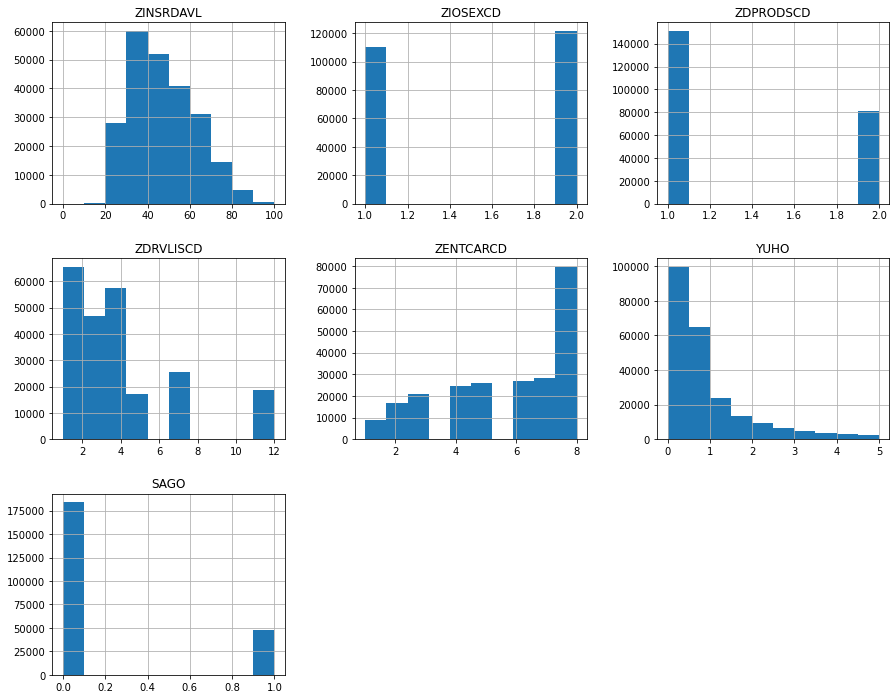

In [ ]:
# 히스토그램 시각화
df_A.hist(figsize=(15, 12))

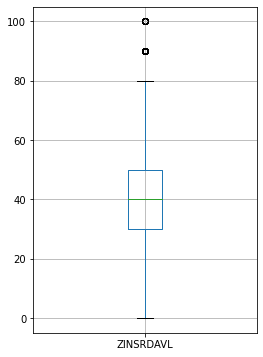

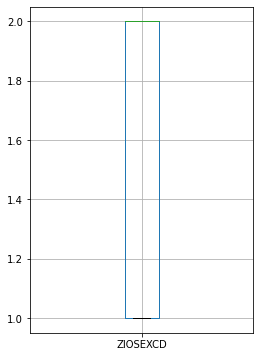

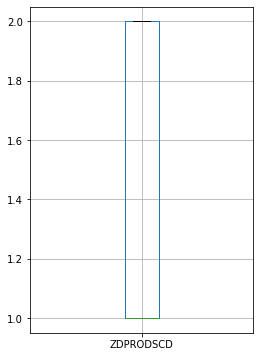

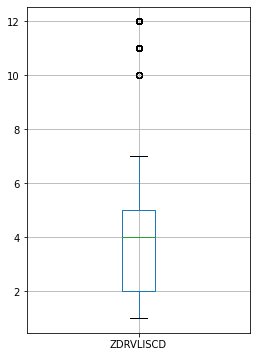

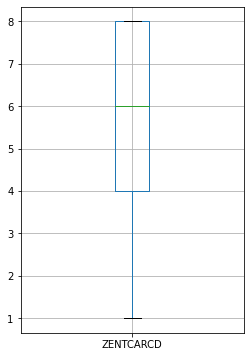

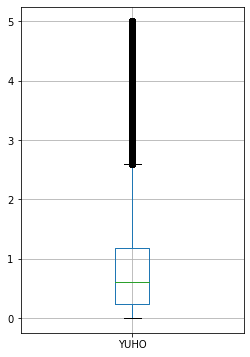

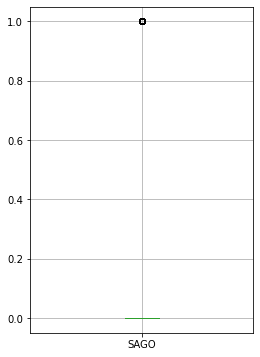

In [ ]:
for num_col in num_cols:
    df_A[[num_col]].boxplot(figsize=(4,6))
    plt.show()

In [ ]:
df_B['SAGO'].value_counts()

0    184076
1     47659
Name: SAGO, dtype: int64